<a href="https://colab.research.google.com/github/venkeeg/Python-codes/blob/master/Tredence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tredence Data Scientist hiring challenge**                           


> Candidate : Venkatesh Gopalarathnam
  

> e-mail    : venkeeg@gmail.com



> Languages and tools used : Python, Pandas, statsmodels and others.










In [ ]:
#Importing necessary modules and reading training file
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

#Reading train.csv into a Pandas DataFrame
df = pd.read_csv('train.csv')

#Converting date to datetime format 
df['date']=pd.to_datetime(df['date'])

#Observing data types
print(df.dtypes)

print(df.head(n=4))

df['dayofweek']=df['date'].dt.dayofweek
print(df.columns)

ID                               object
date                     datetime64[ns]
warehouse_ID                     object
Latitude                        float64
Longitude                       float64
Product_Type                     object
year                              int64
month                            object
is_weekend                       object
is_warehouse_closed              object
daily_dispatch_count            float64
weekly_dispatch_count           float64
dtype: object
       ID       date warehouse_ID   Latitude  Longitude Product_Type  year  \
0  0x2710 2017-01-01     WH_0x3e9  41.681471 -72.794746       Type_A  2017   
1  0x2711 2017-01-02     WH_0x3e9  41.681471 -72.794746       Type_A  2017   
2  0x2712 2017-01-03     WH_0x3e9  41.681471 -72.794746       Type_A  2017   
3  0x2713 2017-01-04     WH_0x3e9  41.681471 -72.794746       Type_A  2017   

     month is_weekend is_warehouse_closed  daily_dispatch_count  \
0  January        Yes                  No       

## Approach 


---


On observing the data from the training file, it was inferred that the target variable to be forecasted '**weekly_dispatch_count**' is specific to Product Type and Warehouse. 

Hence I decided to go with the approach of performing predictions at Product Type and Warehouse level. This means, there would be a specific model for every Product Type and Warehouse ID. 


### Observing stationarity by ADF test 

ADF test was performed on 'weekly_dispatch_count' of every warehouse and Product type combination.

Corresponsing p-values were observed to ascertain if the time series is stationary or non-stationary. 

Since some were found to be stationary and others non-stationary, I decided to go with ARIMA model for forecasting which has the differencing parameter to make the series stationary.

Results of ADF test : (-2.7312991433881306, 0.22331802445522242, 2, 223, {'1%': -3.9999506167815206, '5%': -3.4303636888103926, '10%': -3.138725564735756}, 1269.2865792941948)


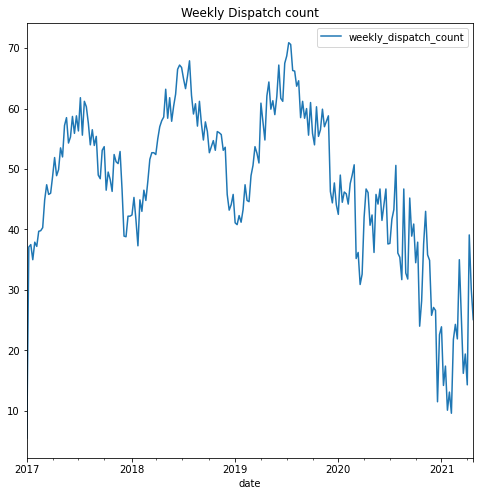

In [ ]:
#Performing ADF test to observe stationarity for every combination of Product type and warehouse ID
from statsmodels.tsa.stattools import adfuller
import numpy as np


temp = df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_A') & (df['warehouse_ID']=='WH_0x3e9')]
#temp['weekly_dispatch_count'] = temp['weekly_dispatch_count'].diff()
#temp.dropna(inplace=True)
print("Results of ADF test :",adfuller(temp['weekly_dispatch_count'],regression='ct'))

temp.plot(figsize=[8,8],x='date',y='weekly_dispatch_count')
plt.title('Weekly Dispatch count')
plt.show()

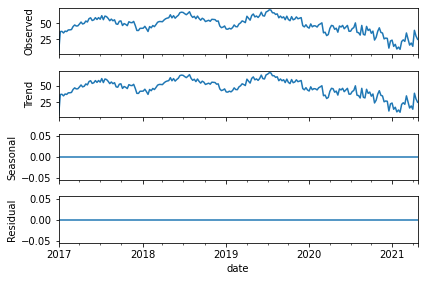

In [ ]:
#Trend, Seasonality components were observed for every combination of Product type and warehouse
from statsmodels.tsa.seasonal import seasonal_decompose

temp1 = df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_A') & (df['warehouse_ID']=='WH_0x3e9')]
temp1.set_index(['date'],inplace=True)

add_temp1 = seasonal_decompose(temp1['weekly_dispatch_count'],model='add',freq=1)
add_temp1.plot()
plt.show()


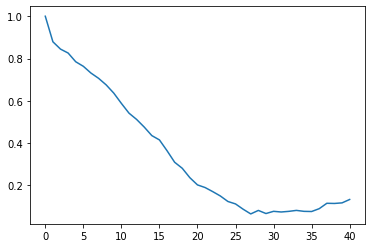

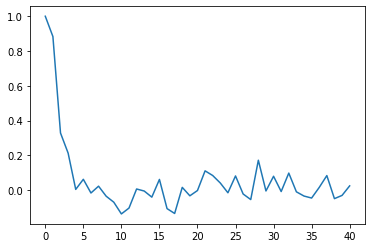

In [ ]:
#Plotting ACF and PACF plots for "weekly_dispatch_count" of every Product Type and warehouse ID
#to ascertain appropriate value for lag to be included in the ARIMA forecasting model

from statsmodels.tsa.stattools import acf,pacf

acf_lag = acf(temp1['weekly_dispatch_count'])
plt.plot(acf_lag)
plt.show()

pacf_lag = pacf(temp1['weekly_dispatch_count'])
plt.plot(pacf_lag)
plt.show()

### Modeling and validation at Product Type and Warehouse level


---


An ARIMA model was used from statsmodels and models were trained for every combination of Product Type and Warehouse ID. Lag values to be used in the ARIMA model were ascertained by visualizing ACF and PACF plots in the previous section for every combination.

 Validation with sample dates was also performed.

In [ ]:
# Warehouse specific Modeling & validation for Product Type - Type A

from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Training model for Product Type - Type_A for 10 warehouses

#WH_0x3e9
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_A') & (df['warehouse_ID']=='WH_0x3e9')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3e9_A  = ARIMA(temp2['weekly_dispatch_count'],order=(4,0,2))


act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3e9_A = model_WH_0x3e9_A.fit()
pred = WH_0x3e9_A.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


#WH_0x3ea
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_A') & (df['warehouse_ID']=='WH_0x3ea')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3ea_A = ARIMA(temp2['weekly_dispatch_count'],order=(5,0,2))


act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3ea_A = model_WH_0x3ea_A.fit()
pred = WH_0x3ea_A.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))

#WH_0x3eb
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_A') & (df['warehouse_ID']=='WH_0x3eb')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3eb_A = ARIMA(temp2['weekly_dispatch_count'],order=(4,0,2))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3eb_A = model_WH_0x3eb_A.fit()
pred = WH_0x3eb_A.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


#WH_0x3ec
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_A') & (df['warehouse_ID']=='WH_0x3ec')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3ec_A = ARIMA(temp2['weekly_dispatch_count'],order=(4,0,3))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3ec_A = model_WH_0x3ec_A.fit()
pred = WH_0x3ec_A.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))

#WH_0x3ed
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_A') & (df['warehouse_ID']=='WH_0x3ed')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3ed_A = ARIMA(temp2['weekly_dispatch_count'],order=(4,0,2))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3ed_A = model_WH_0x3ed_A.fit()
pred = WH_0x3ed_A.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


#WH_0x3ee
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_A') & (df['warehouse_ID']=='WH_0x3ee')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3ee_A = ARIMA(temp2['weekly_dispatch_count'],order=(4,0,0))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3ee_A = model_WH_0x3ee_A.fit()
pred = WH_0x3ee_A.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


#WH_0x3ef
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_A') & (df['warehouse_ID']=='WH_0x3ef')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3ef_A = ARIMA(temp2['weekly_dispatch_count'],order=(2,0,2))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3ef_A = model_WH_0x3ef_A.fit()
pred = WH_0x3ef_A.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))

#WH_0x3f0
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_A') & (df['warehouse_ID']=='WH_0x3f0')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3f0_A = ARIMA(temp2['weekly_dispatch_count'],order=(0,0,2))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3f0_A = model_WH_0x3f0_A.fit()
pred = WH_0x3f0_A.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


#WH_0x3f1
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_A') & (df['warehouse_ID']=='WH_0x3f1')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3f1_A = ARIMA(temp2['weekly_dispatch_count'],order=(4,0,2))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3f1_A = model_WH_0x3f1_A.fit()
pred = WH_0x3f1_A.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


#WH_0x3f2
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_A') & (df['warehouse_ID']=='WH_0x3f2')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3f2_A = ARIMA(temp2['weekly_dispatch_count'],order=(1,0,2))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3f2_A = model_WH_0x3f2_A.fit()
pred = WH_0x3f2_A.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


95.37077567015938
71.46289628298044
91.83146371833922
86.49905343565436
95.99241271810381
50.85711756033482
83.3485040515131
93.57959278024235
83.51491901253249
87.44929931317272


In [ ]:
# Warehouse specific Modeling & validation for Product_Type - Type B

#WH_0x3e9
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_B') & (df['warehouse_ID']=='WH_0x3e9')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3e9_B = ARIMA(temp2['weekly_dispatch_count'],order=(0,1,0))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3e9_B = model_WH_0x3e9_B.fit()
pred = WH_0x3e9_B.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


#WH_0x3ea
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_B') & (df['warehouse_ID']=='WH_0x3ea')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3ea_B = ARIMA(temp2['weekly_dispatch_count'],order=(5,0,2))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3ea_B = model_WH_0x3ea_B.fit()
pred = WH_0x3ea_B.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


#WH_0x3eb
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_B') & (df['warehouse_ID']=='WH_0x3eb')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3eb_B = ARIMA(temp2['weekly_dispatch_count'],order=(4,0,0))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3eb_B = model_WH_0x3eb_B.fit()
pred = WH_0x3eb_B.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))



#WH_0x3ec
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_B') & (df['warehouse_ID']=='WH_0x3ec')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3ec_B = ARIMA(temp2['weekly_dispatch_count'],order=(6,0,2))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3ec_B = model_WH_0x3ec_B.fit()
pred = WH_0x3ec_B.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


#WH_0x3ed
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_B') & (df['warehouse_ID']=='WH_0x3ed')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3ed_B = ARIMA(temp2['weekly_dispatch_count'],order=(6,0,2))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3ed_B = model_WH_0x3ed_B.fit()
pred = WH_0x3ed_B.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


#WH_0x3ee
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_B') & (df['warehouse_ID']=='WH_0x3ee')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3ee_B = ARIMA(temp2['weekly_dispatch_count'],order=(5,0,0))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3ee_B = model_WH_0x3ee_B.fit()
pred = WH_0x3ee_B.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


#WH_0x3ef
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_B') & (df['warehouse_ID']=='WH_0x3ef')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3ef_B = ARIMA(temp2['weekly_dispatch_count'],order=(0,0,0))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3ef_B = model_WH_0x3ef_B.fit()
pred = WH_0x3ef_B.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))



#WH_0x3f0
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_B') & (df['warehouse_ID']=='WH_0x3f0')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3f0_B = ARIMA(temp2['weekly_dispatch_count'],order=(0,0,2))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3f0_B = model_WH_0x3f0_B.fit()
pred = WH_0x3f0_B.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))



#WH_0x3f1
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_B') & (df['warehouse_ID']=='WH_0x3f1')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3f1_B = ARIMA(temp2['weekly_dispatch_count'],order=(0,0,2))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3f1_B = model_WH_0x3f1_B.fit()
pred = WH_0x3f1_B.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


#WH_0x3f2
temp2=df[(df['dayofweek']==6 ) & (df['Product_Type']=='Type_B') & (df['warehouse_ID']=='WH_0x3f2')]
temp2.set_index(['date'],inplace=True)
temp2=temp2[['weekly_dispatch_count']]
model_WH_0x3f2_B = ARIMA(temp2['weekly_dispatch_count'],order=(1,0,2))

act = temp2[(temp2.index >='2021-04-18') & ( temp2.index<='2021-04-18')]
WH_0x3f2_B = model_WH_0x3f2_B.fit()
pred = WH_0x3f2_B.predict(start='2021-04-18',end='2021-04-18')

print(max(0,100*(1-mean_absolute_percentage_error(act,pred))))


0
59.607647937538076
49.849095199135064
80.92004402674505
15.335474088795632
94.12063303214127
82.24062571888659
85.194540348251
99.91389535972961
98.97019817817781


In [ ]:
# warehouse ID specific function for Type_A
def a_pred(whid):
     whouse = {
         
         'WH_0x3e9_A' : WH_0x3e9_A.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3ea_A' : WH_0x3ea_A.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3eb_A' : WH_0x3eb_A.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3ec_A' : WH_0x3ec_A.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3ed_A' : WH_0x3ed_A.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3ee_A' : WH_0x3ee_A.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3ef_A' : WH_0x3ef_A.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3f0_A' : WH_0x3f0_A.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3f1_A' : WH_0x3f1_A.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3f2_A' : WH_0x3f2_A.predict(start='2021-05-02',end='2021-12-26'),

     }


     return whouse.get(whid,0)


# warehouse ID specific function for Type_B
def b_pred(whid):
     whouse = {
         
         'WH_0x3e9_B' : WH_0x3e9_B.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3ea_B' : WH_0x3ea_B.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3eb_B' : WH_0x3eb_B.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3ec_B' : WH_0x3ec_B.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3ed_B' : WH_0x3ed_B.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3ee_B' : WH_0x3ee_B.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3ef_B' : WH_0x3ef_B.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3f0_B' : WH_0x3f0_B.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3f1_B' : WH_0x3f1_B.predict(start='2021-05-02',end='2021-12-26'),

         'WH_0x3f2_B' : WH_0x3f2_B.predict(start='2021-05-02',end='2021-12-26'),

     }

     return whouse.get(whid,0)

# Reading test file
test = pd.read_csv('test.csv',parse_dates=True)

#Reading file - submission_weekly
sub = pd.read_csv('submission_weekly.csv')

#Performing a join on the above files for final prediction
test_new = pd.merge(test,sub,on='ID')

#Retaining only ID, Product type, warehouse ID and weekly dispatch count
test_new = test_new[['ID','Product_Type','warehouse_ID','weekly_dispatch_count']]


## Final predictions


---

Since the test file provided contains weekly periods betwween 2021-05-02 and 2021-12-26 for all combinations of Product Type and Warehouse ID, the test dataframe was grouped by Product Type and Warehouse ID.

At every new group, using the information of Product type and Warehouse ID respective predict methods of the models were called to forecast 'weekly_dispatch_count' values between dates '2021-05-02' and '2021-12-26'. The entire prediction was added in the column corresponding to weekly dispatch count. 

The above rows of every iteration per group were appended to another DataFrame to obtain all the 700 values required for submission.

In [ ]:
#Declaring empty DataFrame to store predicted values
pred_temp = pd.DataFrame(columns=['ID','Product_Type','warehouse_ID','weekly_dispatch_count'])
                         
#Grouping DataFrame test_new by Product_Type and warehouse_Id since our models
# are product type and warehouse specific                         
test_new_gp = test_new.groupby(['Product_Type','warehouse_ID'])

#Empty dataframe with column to store weekly dispatch count predicted over
# 2021-05-02 and 2021-12-26
wkdp = pd.DataFrame(columns=['weekly_dispatch_count'])

#Looping at the grouped DataFrame
for i,j in test_new_gp:
  a,b = i ## a = Product Type, b = warehouse ID
  
  #Retreiving values from test_new into conc_test for particular Product Type and
  #Warehouse ID
  conc_test = test_new[(test_new['Product_Type']==a) & (test_new['warehouse_ID']==b)]
  conc_test.reset_index(drop=True,inplace=True)

  #Drop all data for every iteration
  wkdp.drop(wkdp.index,inplace=True) 
 
  # If product_type is Type A or B call corresponding function with warehouse ID 
  # to predict values for weekly dispatch
  if a == 'Type_A' :
    wkdp['weekly_dispatch_count'] = pd.Series(a_pred(str(b+'_'+'A')))
    wkdp.reset_index(drop=True,inplace=True)
    
    #Store predicted values in corresponding column
    conc_test['weekly_dispatch_count'] = wkdp['weekly_dispatch_count']
  elif a == 'Type_B':
    wkdp['weekly_dispatch_count'] = pd.Series(b_pred(str(b+'_'+'B')))
    wkdp.reset_index(drop=True,inplace=True)
    
    #Store predicted values in corresponding column
    conc_test['weekly_dispatch_count'] = wkdp['weekly_dispatch_count']
    

  #Append the values from above DataFrame to pred_temp 
  pred_temp = pred_temp.append(conc_test)
  

#Final list after all iterations
pred_temp.reset_index(drop=True,inplace=True)


#Reading file submission weekly
final_sub = pd.read_csv('submission_weekly.csv')

#dropping existing column
final_sub.drop(columns=['weekly_dispatch_count'],inplace=True)

#Perform join on submission_weekly file
final_sub = pd.merge(final_sub,pred_temp,on='ID')

#Dropping other columns except "ID" and "weekly_dispatch_count"
final_sub.drop(columns=['Product_Type','warehouse_ID'],inplace=True)
print(final_sub.tail(n=4))

#Saving final submission file to be uploaded to HackerEarth portal
#for scoring
final_sub.to_csv('final_sub.csv',index=False)

         ID  weekly_dispatch_count
696  0x76a8              40.528126
697  0x76a9              14.001932
698  0x7b2c              45.777348
699  0x7b2d              12.352552
